# US Flights Data for 2008
## Statistical Computing Statistical Graphics
## by Abderrahman Benyahya

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays for 2008.

> We will mainly focuse on the length of delay on arrival because this is what interest the people the most to know what are the most predictive factors to avoid

### Importing libraries and the dataset 

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> We load the data that was download using pandas libreary

In [2]:
#We import the data into the dataframe df
df = pd.read_csv('2008.csv')


In [3]:
#We read the first rows to make a visual assessment
df.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
#We see the last rows also
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009727,2008,12,13,6,1110.0,1103,1413.0,1418,DL,1641,...,8.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


### Visual assessment:

- There is a row for the year but all the dataset is about the same year
- We wil instigate the delay on arrival as main features combined with the cause of delay and the day of the week / date. We don't need data for cancelled and diverted flights.
- The day of the week is a digit and not a string 
- The time in the row Deptime and ArrTime is a decimal but neither for the CRSDeptime nor for CRSArrTime


### Programmatic assessment

In [5]:
#We see the shape of the dataset and use info to determine the format for each row
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [6]:
#We check if there are null values 
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [7]:
#We check if the flight where there are no departure time are all cancelled

df[df.DepTime.isnull()].Cancelled.sum()== df.DepTime.isnull().sum()

True

In [8]:
#Number of cancelled flight
(df.Cancelled ==1).sum()

137434

In [9]:
#See if the Arrival null are also cancelled 
print(df.ArrTime.isnull().sum()== df[df.ArrTime.isnull()].Cancelled.sum())
print(df.ArrTime.isnull().sum(),df[df.ArrTime.isnull()].Cancelled.sum())

False
151649 137434


In [10]:
#See the data that is problematic
df_arrivalnotcanceled = df[df.ArrTime.isnull()]
df_arrivalnotcanceled = df_arrivalnotcanceled.query('Cancelled == 0')
df_arrivalnotcanceled.Diverted.sum(), df_arrivalnotcanceled.shape

(14215, (14215, 29))

### Summary

- The null value are due to cancellation and divertion
> We remove data of cancelled and diverted flights

- The time is not in the same format for actual and predicted departure arrival due to null values

- The year is not needed
> We remove the row year

- the date can be included in one row or it could be included in the row with time as datetime
> Convert the rows with time to datetime and remove the unneeded row

- The day of the week is numerical instead of string
> Convert the number to english name of the week



#### Cleaning the dataset

In [11]:
#We create a copy of the dataset and store it in a variable df_clean
df_clean = df.copy()

#### Define
Remove the cancelled and diverted flights

In [12]:
df_clean = df_clean.query('Cancelled == 0')
df_clean = df_clean.query('Diverted == 0')

In [13]:
print(df_clean.Cancelled.value_counts())
print(df_clean.Cancelled.value_counts())

0    6855029
Name: Cancelled, dtype: int64
0    6855029
Name: Cancelled, dtype: int64


In [14]:
df_clean = df_clean.drop(columns =['Cancelled', 'Diverted', 'CancellationCode'], axis=1)

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 26 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(8), object(4)
memory usage: 1.4+ GB


#### Define
We drop the year

In [16]:
df_clean = df_clean.drop('Year', axis=1)

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 25 columns):
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(7), object(4)
memory usage: 1.3+ GB


#### Define 
Transform the day of week to string and replace number by the day

In [18]:
df_clean.DayOfWeek = df_clean.DayOfWeek.astype('object')

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 25 columns):
Month                int64
DayofMonth           int64
DayOfWeek            object
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(6), object(5)
memory usage: 1.3+ GB


In [20]:
df_clean['DayOfWeek'] = df_clean.DayOfWeek.replace(to_replace=[1,2,3,4,5,6,7], value=["Monday","Tuesay","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [21]:
df_clean.DayOfWeek.value_counts()

Wednesday    1016995
Monday       1013410
Thursday     1011970
Friday       1008872
Tuesay       1005992
Sunday        956127
Saturday      841663
Name: DayOfWeek, dtype: int64

#### Define
Melt the month and the day to create a datetime row

In [25]:
df_clean['Datetime'] = df_clean['Month'].map(str)+ "/" +df_clean['DayofMonth'].map(str)+"/"+ "2008"

In [28]:
df_clean['Datetime'].value_counts()

7/18/2008     20884
7/17/2008     20881
6/20/2008     20821
7/25/2008     20796
7/16/2008     20752
7/11/2008     20747
7/7/2008      20719
8/1/2008      20704
7/14/2008     20702
7/3/2008      20699
6/30/2008     20680
6/12/2008     20673
8/18/2008     20650
7/30/2008     20647
7/21/2008     20639
7/28/2008     20626
8/13/2008     20620
8/8/2008      20603
7/1/2008      20597
6/27/2008     20597
3/14/2008     20591
4/18/2008     20565
3/13/2008     20564
2/15/2008     20556
7/15/2008     20539
3/28/2008     20534
8/6/2008      20524
4/24/2008     20524
6/25/2008     20521
7/2/2008      20520
              ...  
2/9/2008      15918
7/4/2008      15899
2/2/2008      15885
12/21/2008    15866
1/26/2008     15814
12/27/2008    15685
3/8/2008      15670
8/30/2008     15407
12/20/2008    15366
1/19/2008     15351
12/31/2008    15118
12/25/2008    14985
11/22/2008    14944
12/24/2008    14905
8/31/2008     14779
11/8/2008     14773
11/15/2008    14664
11/1/2008     14513
10/11/2008    14496


In [29]:
df_clean['Datetime'] = pd.to_datetime(df_clean['Datetime'])

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 26 columns):
Month                int64
DayofMonth           int64
DayOfWeek            object
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Datetime             datetime64[ns]
dtypes: datetime64[ns](1), float64(14), int64(6), object(5)
memory usage: 1.4+ GB


In [31]:
df_clean = df_clean.drop(columns =['Month','DayofMonth'], axis =1)

In [32]:
df_clean.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Datetime
0,Thursday,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,...,TPA,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,Thursday,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,...,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,Thursday,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,...,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,Thursday,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,...,BWI,515,3.0,7.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,Thursday,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,...,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [33]:
df_clean.to_csv('exploration_flight.csv', index=False)

In [4]:
df_explore = pd.read_csv('exploration_flight.csv')

In [35]:
df_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855029 entries, 0 to 6855028
Data columns (total 24 columns):
DayOfWeek            object
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Datetime             object
dtypes: float64(14), int64(4), object(6)
memory usage: 1.2+ GB


In [36]:
df_explore.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Datetime
0,Thursday,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,...,TPA,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,Thursday,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,...,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,Thursday,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,...,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,Thursday,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,...,BWI,515,3.0,7.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,Thursday,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,...,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,2008-01-03


> #### We noticed that the datetime row was not correctly converted to datetime, we needed to do it again

In [75]:
df_explore['Datetime'] = pd.to_datetime(df_explore['Datetime'])

### What is the structure of your dataset?

> The Dataset after being cleanng is composed of more than 7 million flight for the year 2008.Most of variables are numeric in nature apart from the Day of the week, the Unique Carrier, the TailNum, the name of origin and destination. The Time for actual Departure and Arrival is float as there are NaN values.

### What is/are the main feature(s) of interest in your dataset?

>the main feature of interests:

> - For which parameters are there most of the delays on arrival?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the Distance should be the most predictive parameter for the delays and the origin / destination for the cancelled flight as it depends mainly on weather
> We can also have a list of best and worst flight number, day of week, origin, destination, departure time and arrival for the delays 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### **Delay on arrival**

Text(0, 0.5, 'Number of flights')

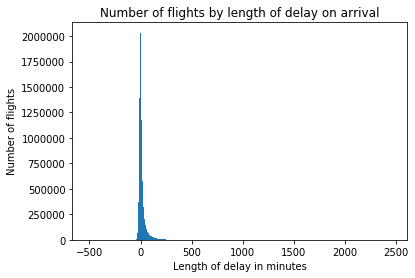

In [38]:
bins = np.arange(df_explore.ArrDelay.min(),df_explore.ArrDelay.max()+10,10)
plt.hist(data=df_explore, x='ArrDelay', bins=bins);
plt.title('Number of flights by length of delay on arrival')
plt.xlabel('Length of delay in minutes')
plt.ylabel('Number of flights')



As we can hope, the vast majority of flight arrive on time (0) but there are very extrem limit value that wde have to check for errors

In [39]:
df_explore.ArrDelay.min(),df_explore.ArrDelay.max()

(-519.0, 2461.0)

##### We check for the value that are less than 0 using the xlim and yscale to see the values

Text(0, 0.5, 'Number of flights log function')

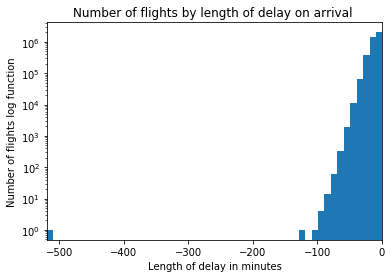

In [40]:
bins = np.arange(df_explore.ArrDelay.min(),df_explore.ArrDelay.max()+10,10)
plt.hist(data=df_explore, x='ArrDelay', bins=bins);
plt.yscale('log')
plt.xlim(-519, 0)
plt.title('Number of flights by length of delay on arrival ')
plt.xlabel('Length of delay in minutes')
plt.ylabel('Number of flights log function')

It seems that there are almost no values between -519and -150. The 519 is a unique value. We check

In [41]:
df_explore.query('ArrDelay < -150')

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Datetime
5058984,Monday,136.0,1030,456.0,1335,HA,7,N587HA,380.0,365.0,...,HNL,2762,5.0,20.0,NaN,NaN,NaN,NaN,NaN,2008-09-21


It appears that the flights was ahead in avance with the expected departure, or it could be human error. 

We do the same for the extrem value delays

Text(0, 0.5, 'Number of flights log function')

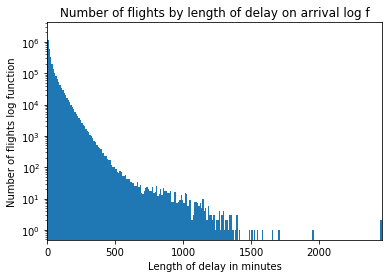

In [42]:
bins = np.arange(df_explore.ArrDelay.min(),df_explore.ArrDelay.max()+10,10)
plt.hist(data=df_explore, x='ArrDelay', bins=bins);
plt.yscale('log')
plt.xlim(0, 2461)
plt.title('Number of flights by length of delay on arrival log f')
plt.xlabel('Length of delay in minutes')
plt.ylabel('Number of flights log function')

We can see that the distribution is more spred out but there are lot's of blank after 1440 which is the value for 24hours. The exterem value is unique we can check the flight that have more than 24hours delay

In [43]:
df_explore[(df_explore.ArrDelay >= 1440)]

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Datetime
510659,Saturday,800.0,1045,1452.0,1327,AA,2398,N622AA,292.0,42.0,...,MIA,1811,14.0,71.0,1158.0,0.0,117.0,0.0,250.0,2008-01-01
983542,Sunday,1117.0,1820,2256.0,555,NW,808,N817NW,459.0,455.0,...,MSP,3972,6.0,16.0,1455.0,0.0,4.0,0.0,1002.0,2008-02-14
1581160,Friday,705.0,615,811.0,721,NW,1743,N786NC,66.0,66.0,...,MEM,200,5.0,14.0,1490.0,0.0,0.0,0.0,0.0,2008-03-23
2167875,Sunday,1818.0,1633,1942.0,1800,NW,1472,N8986E,84.0,87.0,...,MSP,449,7.0,14.0,1542.0,0.0,0.0,0.0,0.0,2008-04-09
2170743,Thursday,724.0,1417,858.0,1605,NW,1699,N3324L,154.0,168.0,...,MSP,930,8.0,14.0,2436.0,0.0,0.0,0.0,17.0,2008-04-08
2757445,Tuesay,2.0,1530,254.0,1823,NW,1107,N333NW,172.0,173.0,...,DTW,1085,10.0,17.0,1951.0,0.0,0.0,0.0,0.0,2008-05-24
3302897,Friday,2140.0,1710,2252.0,1825,MQ,3538,N512AE,72.0,75.0,...,DFW,304,6.0,16.0,1707.0,0.0,0.0,0.0,0.0,2008-06-22
3961782,Wednesday,820.0,702,1325.0,1215,NW,804,N596NW,185.0,193.0,...,MSP,1399,7.0,18.0,1510.0,0.0,0.0,0.0,0.0,2008-07-06
5110628,Monday,906.0,714,1048.0,825,NW,512,N322US,102.0,71.0,...,MSP,282,4.0,23.0,1552.0,0.0,31.0,0.0,0.0,2008-09-01
6707550,Friday,1602.0,1325,1921.0,1546,NW,357,N366NW,259.0,201.0,...,MSP,1124,8.0,59.0,1307.0,0.0,58.0,0.0,290.0,2008-12-12


Text(0, 0.5, 'Number of flights')

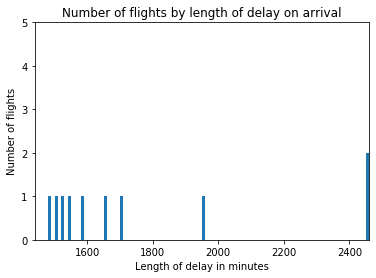

In [44]:
plt.hist(data=df_explore, x='ArrDelay', bins=bins);
plt.ylim(0,5)
plt.xlim(1440, 2461)
plt.title('Number of flights by length of delay on arrival')
plt.xlabel('Length of delay in minutes')
plt.ylabel('Number of flights')

We make a new visualisation that show the distribution between -150 and 1440 min

Text(0.5, 1.0, 'Number of flights by minutes of delays')

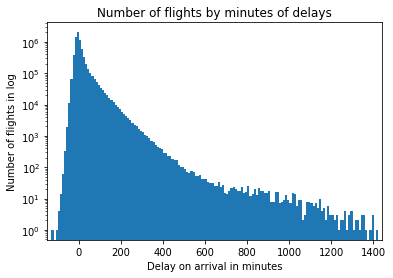

In [45]:
bins = np.arange(df_explore.ArrDelay.min(),df_explore.ArrDelay.max()+10,10)
plt.hist(data=df_explore, x='ArrDelay', bins=bins);
plt.yscale('log')
plt.xlim(-150, 1440)
plt.xlabel('Delay on arrival in minutes')
plt.ylabel('Number of flights in log')
plt.title('Number of flights by minutes of delays')

The figure shows that most of the flights by far are on time, some are ahead but there are lot's of delay that can be for hours and even one day. Hopefully the number of delays decreese with the lenght of delay.

We want to see the propotion of flights that are on time and those who are ahead and in delay

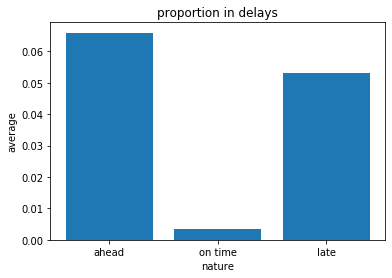

In [5]:
ahead = (df_explore.ArrDelay<0).sum() / (df_explore.ArrDelay).sum()
on_time = (df_explore.ArrDelay ==0).sum() / (df_explore.ArrDelay).sum()
late = (df_explore.ArrDelay>0).sum() / (df_explore.ArrDelay).sum()
locations = [1, 2, 3]
heights = [ahead, on_time, late]
labels = ["ahead", "on time", "late"]
plt.bar(locations, heights, tick_label=labels)
plt.title('proportion in delays')
plt.xlabel('nature')
plt.ylabel('average');


> #### The result is not as expected: the majority are not on time but ahead time.

### **Distance**

Text(0, 0.5, 'Number of flights')

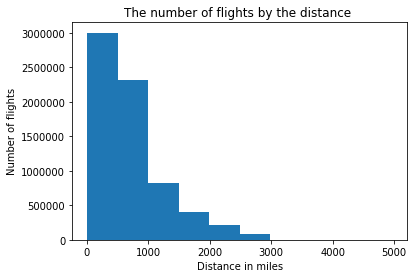

In [47]:
plt.hist(data=df_explore, x='Distance');
plt.title('The number of flights by the distance ')
plt.xlabel('Distance in miles')
plt.ylabel("Number of flights")


Clearly the majority of flight are less than 1000. We cannot see what is hapening after 3000. We need to check

In [48]:
(df_explore.Distance > 3000).sum()

10593

(0, 10000)

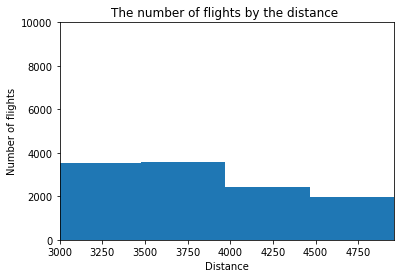

In [49]:
plt.hist(data=df_explore, x='Distance');
plt.title('The number of flights by the distance ')
plt.xlabel('Distance')
plt.ylabel("Number of flights")
plt.xlim(3000, df_explore.Distance.max())
plt.ylim(0, 10000)

In [50]:
df_explore[(df_explore.Distance == df_explore.Distance.max())].Origin.value_counts()

EWR    361
HNL    359
Name: Origin, dtype: int64

In [51]:
df_explore[(df_explore.Distance == df_explore.Distance.max())].Dest.value_counts()

HNL    361
EWR    359
Name: Dest, dtype: int64

In [52]:
df_explore.Distance.max()

4962

The longest flight is one between EWR and HNL which is according to information 4951 mi between Newark-Liberty (EWR)and Honolulu

### Causes for delay

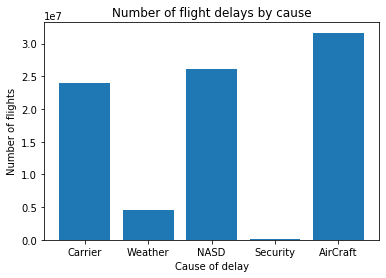

In [53]:
CarrierDelay = df_explore.CarrierDelay.sum()        
WeatherDelay = df_explore.WeatherDelay.sum()
NASDelay= df_explore.NASDelay.sum()
SecurityDelay = df_explore.SecurityDelay.sum()      
LateAircraftDelay = df_explore.LateAircraftDelay.sum()

locations = [1, 2, 3, 4, 5]
heights = [CarrierDelay, WeatherDelay, NASDelay,SecurityDelay, LateAircraftDelay ]
labels = ["Carrier", "Weather", "NASD", "Security", "AirCraft"]
plt.bar(locations, heights, tick_label=labels)
plt.title('Number of flight delays by cause')
plt.xlabel('Cause of delay')
plt.ylabel('Number of flights');

> #### We see that the majority of delays are human due and few are due to Weather. The security is not an important factor 

### **Days of week**

> #### We want to check the distribution of flights by day of the week

In [54]:
df_explore.DayOfWeek.value_counts()

Wednesday    1016995
Monday       1013410
Thursday     1011970
Friday       1008872
Tuesay       1005992
Sunday        956127
Saturday      841663
Name: DayOfWeek, dtype: int64

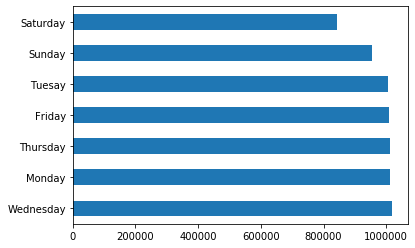

In [55]:
CountWeekDays = pd.value_counts(df_explore['DayOfWeek'].values, sort=True)
CountWeekDays.plot.barh()

> #### The vizualisation give an information that does not seem evident: there are less flights on Week Ends

### Worst Origin cities and Destinations

> As the number of cities of origin are too many, we cast among the delays the cities that are the most common

> #### We calculate the number of flights late for each city against the total number of flight to have the proportion

In [56]:
late_arrivals = df_explore.query('ArrDelay > 0')

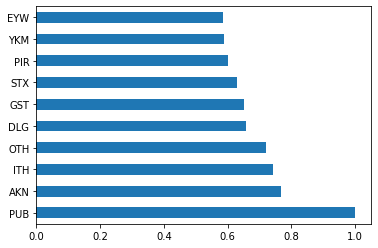

In [57]:
(late_arrivals.Origin.value_counts() / df_explore.Origin.value_counts()).sort_values(ascending=False)[:10].plot.barh()

In [58]:
df_explore[(df_explore.Origin == "PUB")]

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Datetime
3610604,Tuesay,1740.0,1655,1814.0,1704,XE,104,N14174,34.0,9.0,...,COS,37,5.0,18.0,0.0,45.0,25.0,0.0,0.0,2008-07-04
3610905,Monday,1331.0,1322,1449.0,1331,XE,117,N12163,78.0,9.0,...,COS,37,8.0,41.0,0.0,9.0,69.0,0.0,0.0,2008-07-05


> #### We can see that PUB has 100% flights that are late. We found out that there are only two flight from PUB which were late.

> #### Apart from PUB, the Origin cities for whoch there are in proportion more delays on arrival are AKN, ITH, OTH, DLG, GST, STX, PIR, YKM et EYW

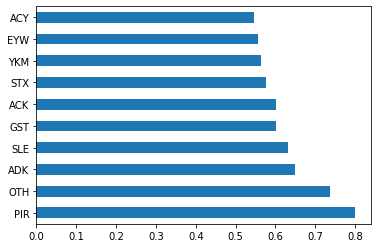

In [59]:
(late_arrivals.Dest.value_counts() / df_explore.Dest.value_counts()).sort_values(ascending=False)[:10].plot.barh()

>#### The destination that have most delay in proportion is PIR then OTH,ADK,SLE,GST,ACK,STX,YKM,EYW,ACY

> #### Let's see what are the origin with less delays in proportion

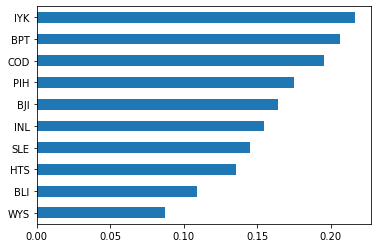

In [60]:
(late_arrivals.Origin.value_counts() / df_explore.Origin.value_counts()).sort_values()[:10].plot.barh()

> #### The origin city that have in proportion less delay on arrival is WYS

> #### Let's do the same for destinations

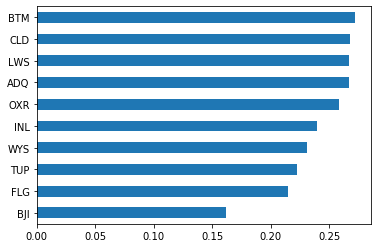

In [61]:
(late_arrivals.Dest.value_counts() / df_explore.Dest.value_counts()).sort_values()[:10].plot.barh()

> #### BJI is the airport that has less delay on arrival in proportion

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the delays on Arrival, the visualizaton was difficult to read we used bins to ease the interpretation but the plot was very dispersed and we decided to use limit for the two axis to see the limit value and log for y value to see the fewer values at the extrem. W
we did the same for the extrem positive value using log and limit.

> For the distance we did not use any tranformation for the distance as it is straighforward

> For the causes of delay and proportion of day of week, there were no need of using transformation as there are categorical.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the Arrival delay, we found out one value in extrem is unique and far from other suggesting an errror. The same was found for extrem posituive value for more than 24 hours. We decided to disregard those  value using limit to exclude the extrem and to focuse on information between -150 and +1440. I did not change the data but to focus on the information that are the most relevant to the analysis

> I created also plot to compare the proportion of flight that are ahead, on time and late. But we found that the flight on time are the fewest and that most of flight arrive ahead time (which is not problematic)

## Bivariate Exploration

> We will see now if there are relation between the distance and the arrival delay, the length of delay and weather, the delay taking into account the date in the year and the day of the week

## 1. Distance and Arrival delay

#### We made an assumption that there should be some correlation between the Distance and the Arrival delay 

Text(0.5, 1.0, 'relation between the distance and the lenght of delay on arrival')

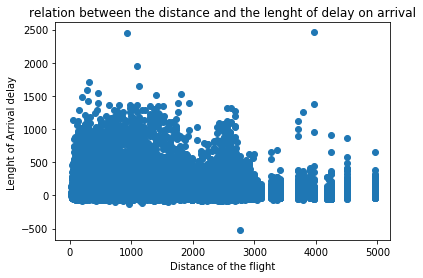

In [62]:
plt.scatter(x=df_explore['Distance'], y=df_explore['ArrDelay'])
plt.xlabel('Distance of the flight')
plt.ylabel('Lenght of Arrival delay ')
plt.title('relation between the distance and the lenght of delay on arrival')

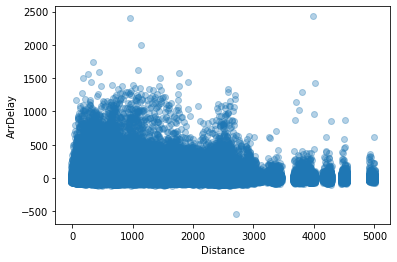

In [63]:
#We try with the seaborn library using jitters and alpha to see the proportion
sb.regplot(data = df_explore, x = 'Distance', y = 'ArrDelay', fit_reg = False,
           x_jitter = 50, y_jitter = 50, scatter_kws = {'alpha' : 1/3})

> #### Suprisingly, it is very difficult to found the positive correlation between the distance and the arrival delay. On contrary, we can see a bit of negative correlation: that there are less probability to have important delay for long distance

#### We will explore next the relation between the lenght of delay on arrival and the weather as it was one of the prediction

###  2. Lenght of delay on arrival vs weather

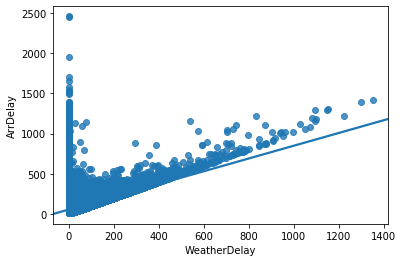

In [64]:
sb.regplot(data = df_explore, x = 'WeatherDelay', y = 'ArrDelay')




> #### If we exclude other cases, we see that there is a positive relation between the lenght of delay and the weather 

##  Lenght of delay on arrival and the days of the week

> As it is a clearly categorical information, we will use violin and box plots

Text(0, 0.5, 'Length of arrival delay in minutes')

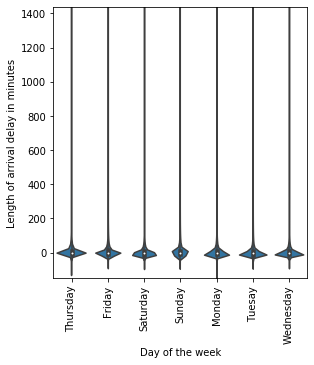

In [66]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
bins = np.arange(df_explore.ArrDelay.min(),df_explore.ArrDelay.max()+10,10)

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_explore, x = 'DayOfWeek', y = 'ArrDelay', color = base_color, bins=bins)
plt.xticks(rotation = 90)
plt.ylim(-150,1440)
plt.xlabel('Day of the week')
plt.ylabel('Length of arrival delay in minutes')

(0, 100)

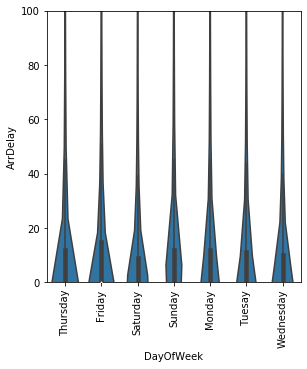

In [72]:
#WIth all the value, it is difficult to assess for which day there are more and longer delays so we use limit to focus
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
bins = np.arange(0,100+10,10)

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_explore, x = 'DayOfWeek', y = 'ArrDelay', color = base_color, bins=bins)
plt.xticks(rotation = 90)
plt.ylim(0,100)

> It shows that the Sunday is the day were there are more and longest delay

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Suprinsingly, the relation between the distance and the length of delay on arrival is not positive but slightly negative.

> There is clearly a postive relation between weather and the length of delay on arrival

> Even if there are less flight on week end it appears that Sunday is the worst day for the delays

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

> We will now see the relation between the arrival delay length, the Distance and the day of the week

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


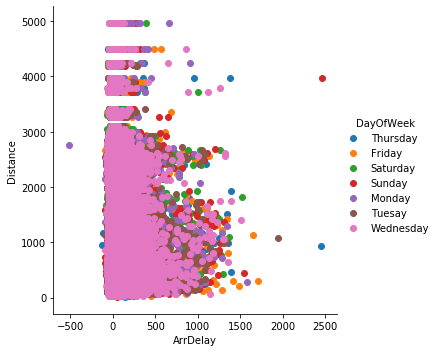

In [68]:
g = sb.FacetGrid(data = df_explore, hue = 'DayOfWeek', size = 5)
g.map(plt.scatter, 'ArrDelay', 'Distance')
g.add_legend()

> ##### We can see that there is no relation between the three variable. But it seems that Wednesday are not the worst days in terms of delays, Sunday and Monday were the worst one.

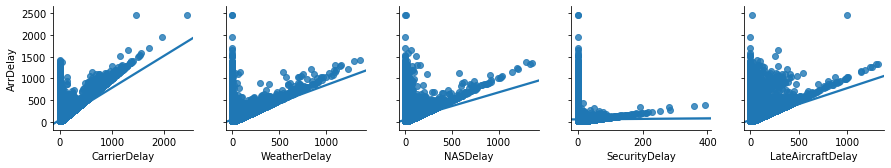

In [70]:
g = sb.PairGrid(data = late_arrivals, x_vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
                y_vars = ['ArrDelay'])
g.map(sb.regplot)

> #### It is clear that there are relation between the delay on arrival length and the cause of delays but, this is to see that the less important is security and the most important one is Carrier

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the last vizualisatons shows that the length of delay is in relation with the Carrier and less with Security issue.

### Were there any interesting or surprising interactions between features?

> The first assumption made that there is a relation between the delay and the distance is not proved. Moreover, weather is less important that human causes for length in delay